## Instacart Analysis Reccomendation Engine Project (Kaggle)

### Business Question: Which customers will be likely to buy again? How big will their orders be?

Importing initial libraries for data analysis:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Reading in the csv files into variables:

(Had to officially move over to Python 3 64 bit distribution due to memory errors).

In [5]:
aisles = pd.read_csv('C:\\Users\\kj.park\\Desktop\Class\\Instacart\\aisles.csv')
order_products_prior = pd.read_csv("C:\\Users\\kj.park\\Desktop\\Class\\Instacart\\order_products__prior.csv")
orders = pd.read_csv("C:\\Users\\kj.park\\Desktop\\Class\\Instacart\\orders.csv")
products = pd.read_csv("C:\\Users\\kj.park\Desktop\\Class\\Instacart\\products.csv")
order_products_train = pd.read_csv("C:\\Users\\kj.park\\Desktop\\Class\\Instacart\\order_products__train.csv")
departments = pd.read_csv("C:\\Users\\kj.park\\Desktop\\Class\\Instacart\\departments.csv")

create for loop to print out the shapes of all of the variables

In [13]:
var_list = [aisles, order_products_prior, orders, products, order_products_train, departments]
name_list = ['aisles', 'order_products_prior', 'orders', 'products', 'order_products_train', 'departments']
count = 0
for var in var_list:
    print(name_list[count],":", var.shape)
    count += 1

aisles : (134, 2)
order_products_prior : (32434489, 4)
orders : (3421083, 7)
products : (49688, 4)
order_products_train : (1384617, 4)
departments : (21, 2)


It appears that our train and test files are the largest of the bunch.

In [14]:
var_list = [aisles, order_products_prior, orders, products, order_products_train, departments]
name_list = ['aisles', 'order_products_prior', 'orders', 'products', 'order_products_train', 'departments']
count = 0
for var in var_list:
    print(name_list[count],":", var.describe)
    count += 1

aisles : <bound method NDFrame.describe of      aisle_id                          aisle
0           1          prepared soups salads
1           2              specialty cheeses
2           3            energy granola bars
3           4                  instant foods
4           5     marinades meat preparation
5           6                          other
6           7                  packaged meat
7           8                bakery desserts
8           9                    pasta sauce
9          10               kitchen supplies
10         11               cold flu allergy
11         12                    fresh pasta
12         13                 prepared meals
13         14         tofu meat alternatives
14         15               packaged seafood
15         16                    fresh herbs
16         17             baking ingredients
17         18   bulk dried fruits vegetables
18         19                  oils vinegars
19         20                   oral hygiene
20         2

Interestingly, there are order_hour_of_day and order_dow to see what time and day people order the most:

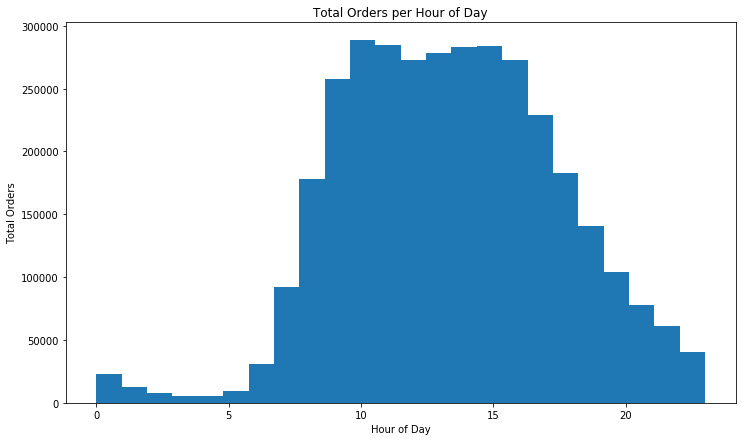

In [8]:
plt.figure(figsize={12,7})
plt.hist(orders['order_hour_of_day'], bins = 24)
plt.title('Total Orders per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Orders')
plt.show()

Looks about standard for a workday and the order frequencies occur most during the standard work hours. Let's see at what frequency people order during each day:

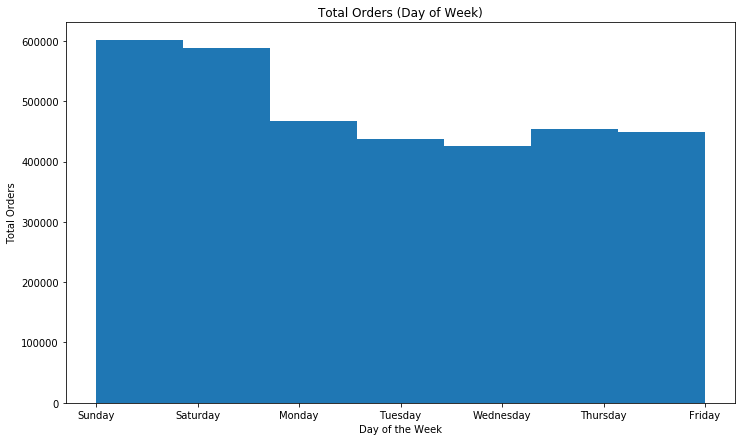

In [9]:
plt.figure(figsize={12,7})
plt.hist(orders['order_dow'], bins=7)
plt.ylabel('Total Orders')
plt.xlabel('Day of the Week')
plt.xticks(range(7), ("Sunday", "Saturday", "Monday","Tuesday", "Wednesday", "Thursday", "Friday"))
plt.title('Total Orders (Day of Week)')
 
plt.show()

In [10]:
plt.figure(figsize={12,7})
plt.hist(orders['days_since_prior_order'], bins = 1000, lrange-)
plt.ylabel('Orders')
plt.title('days_since_prior_order')
 
plt.show()

SyntaxError: invalid syntax (<ipython-input-10-8a8a86700237>, line 2)

It appears that most orders occur on the weekends. We can assume then that the most popular times to order are 10AM to 3PM while the most popular days to order are Sunday and Saturday.

In [30]:
order_products_train.head()
#add_t0_cart_order = how many of productid added to cart.
#reordered = boolean statement to see if this is another order from the same customer


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [17]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Joining together all reference tables to order_products_prior for analysis and prepping the data to include all details.

In [22]:
#Doing left joins to catch all null values
prior_orders =  pd.merge(order_products_prior, products, how='left')
prior_orders = pd.merge(prior_orders, aisles, how = 'left')
prior_orders = pd.merge(prior_orders, departments, how = 'left')
prior_orders = pd.merge(prior_orders, orders, how = 'left')
prior_orders.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [23]:
#Looking at how many rows there are for each column value
total_rows = prior_orders.count()
print(total_rows)

order_id                  32434489
product_id                32434489
add_to_cart_order         32434489
reordered                 32434489
product_name              32434489
aisle_id                  32434489
department_id             32434489
aisle                     32434489
department                32434489
user_id                   32434489
eval_set                  32434489
order_number              32434489
order_dow                 32434489
order_hour_of_day         32434489
days_since_prior_order    30356421
dtype: int64


There are some people who choose to not be return customers (one time purchases)

In [49]:
#Looking at how many people re-order
reorder_rate = (len(order_products_prior[order_products_prior['reordered'] == 1]) / len(order_products_prior['reordered']))
                                 
print("Reorder Rate: " + str(reorder_rate))

Reorder Rate: 0.5896974667922161


59% Reorder Rate. Granted these could be first time customers

Products Ordered most often or Best Selling Products:

In [64]:
best_selling = order_products_train.groupby('product_id')
best_selling_count = best_selling['product_id'].count()
best_selling_count = best_selling_count.reset_index(name='count').sort_values(['count'], ascending=False)
best_selling = best_selling.head(11)
best_sellers = pd.merge(best_selling, products, on = 'product_id', how = 'inner', sort = False)
best_sellers.head(11)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16
5,2445303,49302,2,1,Bulgarian Yogurt,120,16
6,2853065,49302,12,1,Bulgarian Yogurt,120,16
7,3231517,49302,6,1,Bulgarian Yogurt,120,16
8,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
9,68474,11109,8,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
